In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'F:\Data_Engineering\projects\01_Labor_training\notebooks':
  os.chdir(r'F:\Data_Engineering\projects\01_Labor_training\notebooks')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"C:\\Users\\bfiro\\.conda\\envs\\pydata\\Lib\\importlib\\_bootstrap.py": 1707250784.0, "C:\\Users\\bfiro\\.conda\\envs\\pydata\\Lib\\importlib\\_bootstrap_external.py": 1707250784.0, "C:\\Users\\bfiro\\.conda\\envs\\pydata\\Lib\\zipimport.py": 1707250784.0, "C:\\Users\\bfiro\\.conda\\envs\\pydata\\Lib\\codecs.py": 1707250784.0, "C:\\Users\\bfiro\\.conda\\envs\\pydata\\Lib\\encodings\\aliases.py": 1707250784.0, "C:\\Users\\bfiro\\.conda\\envs\\pydata\\Lib\\encodings\\__init__.py": 1707250784.0, "C:\\Users\\bfiro\\.conda\\envs\\pydata\\Lib\\encodings\\utf_8.py": 1707250784.0, "C:\\Users\\bfiro\\.conda\\envs\\pydata\\Lib\\encodings\\cp1252.py": 1707250784.0, "C:\\Users\\bfiro\\.conda\\envs\\pydata\\Lib\\abc.py": 1707250784.0, "C:\\Users\\bfiro\\.conda\\envs\\pydata\\Lib\\io.py": 1707250784.0, "C:\\Users\\bfiro\\.conda\\envs\\pydata\\Lib\\stat.py": 1707250784.0, "C:\\Users\\bfiro\\.conda\\envs\\pydata\\Lib\\_collections_abc.py": 1707250784.0, "C:\\Users\\bfiro\\.conda\\envs\\pydata\\Lib\\

In [2]:
import sys
sys.path.append('../src/')

import loader
import numpy as np
import pandas as pd
from datetime import datetime as dt

from IPython.display import Markdown, display

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from arch.unitroot.unitroot import DFGLS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

plt.rcParams['font.family'] = 'Adobe Caslon Pro'
plt.rcParams['font.size'] = 12

import warnings
warnings.filterwarnings("ignore")

print("setting up the data...")

macro_data = loader.startupMacro()
data = macro_data.load()

setting up the data...


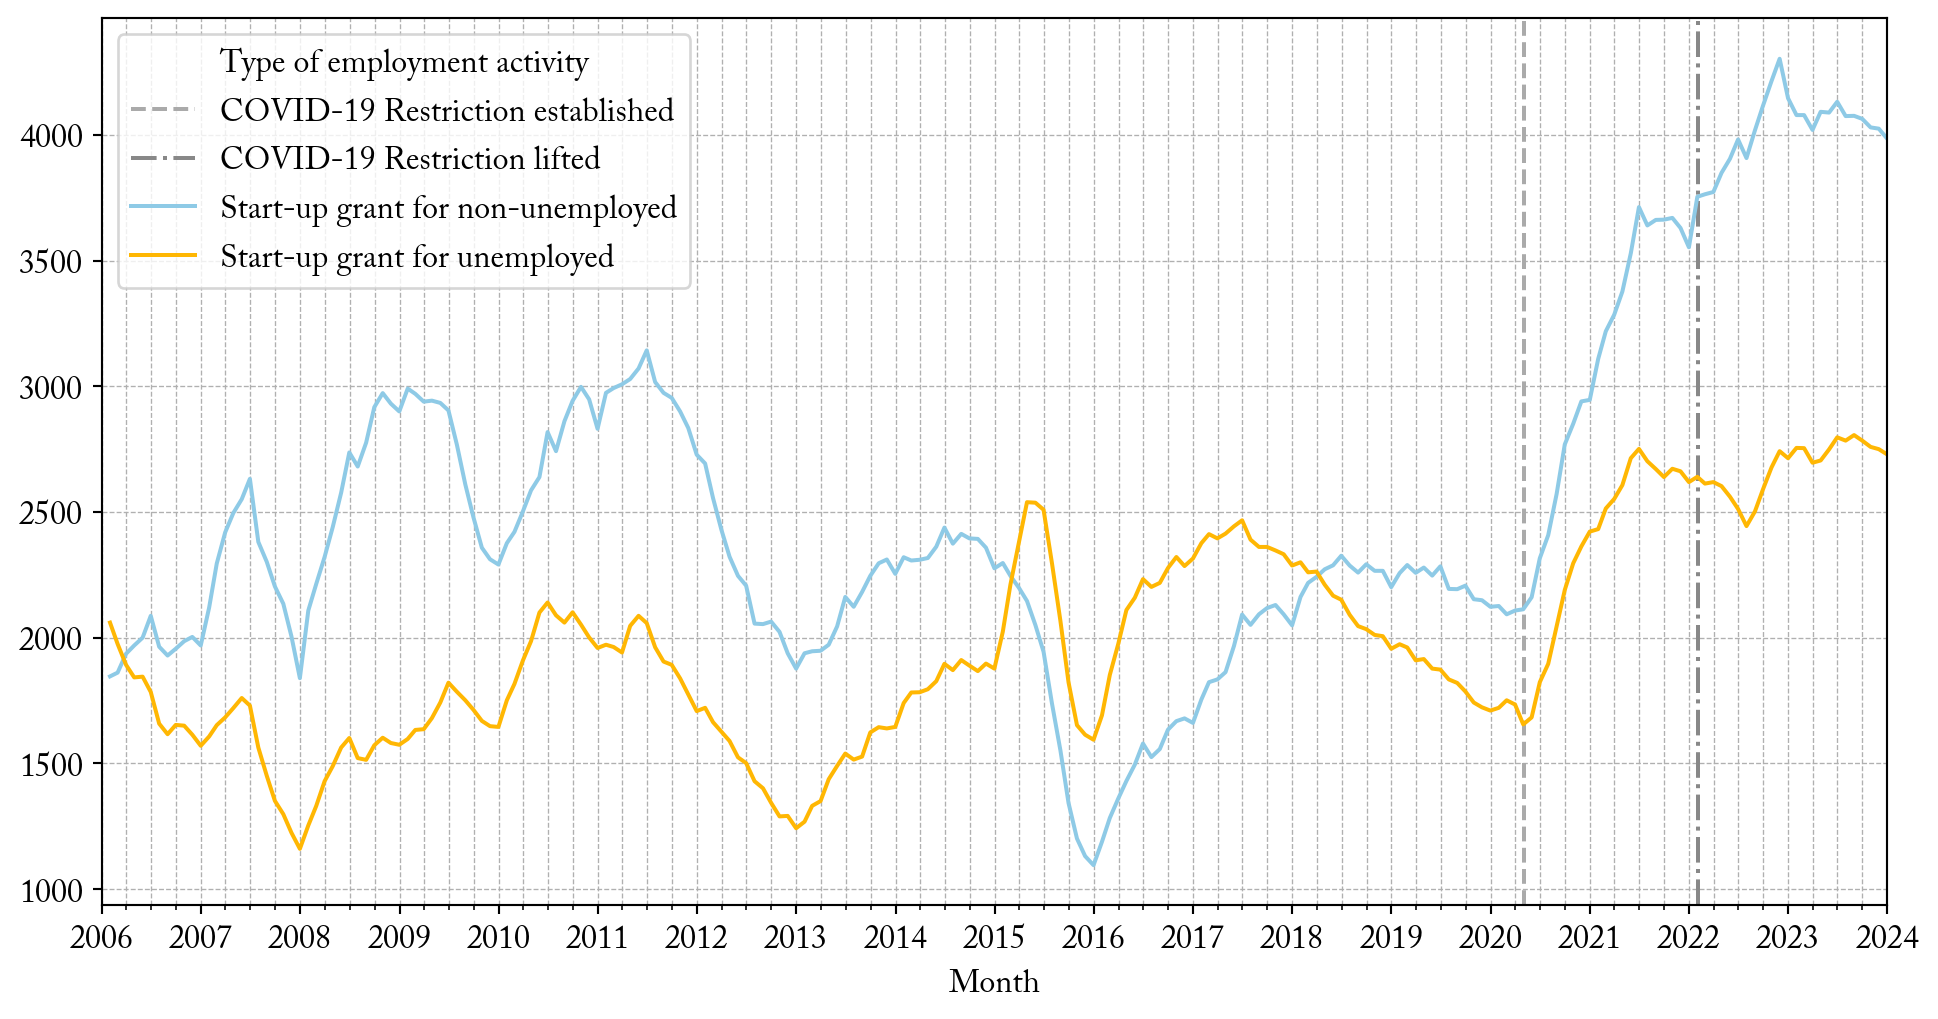

In [3]:
plt.figure(figsize=(12, 6))
plt.grid(True, which="both", ls="--", lw=0.5)

COVID = dt.strptime("2020-05-01", '%Y-%m-%d')
NORMAL = dt.strptime("2022-02-01", '%Y-%m-%d')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))

plt.xlim(
	dt.strptime("2006-01-01", '%Y-%m-%d'), 
	dt.strptime("2024-01-01", '%Y-%m-%d')
	)

plt.axvline(x=COVID, color='#AAAAAA', linestyle='--',  label='COVID-19 Restriction established', lw=1.5)
plt.axvline(x=NORMAL, color='#888888', linestyle='-.',  label='COVID-19 Restriction lifted', lw=1.5)
sns.lineplot(data=data.loc[:,[
	"Start-up grant for non-unemployed",
	"Start-up grant for unemployed"
]], palette=["#8ecae6","#ffb703"], dashes=False, ax=ax)


plt.show()

In [4]:
col1 = "Start-up grant for non-unemployed"
test_1 = DFGLS(data[col1], max_lags=12, method="bic").summary()

test_1

Test Statistic,-0.625
P-value,0.462
Lags,7


In [5]:
col2 = "Start-up grant for unemployed"
test_2 = DFGLS(data[col2], max_lags=12, method="bic").summary()
test_2

Test Statistic,-1.443
P-value,0.144
Lags,7


In [6]:
col1 = "Start-up grant for non-unemployed"
test_1 = DFGLS(data[col1].diff().dropna(), max_lags=12, method="bic").summary()
test_1

Test Statistic,-4.039
P-value,0.000
Lags,6


In [7]:
col2 = "Start-up grant for unemployed"
test_2 = DFGLS(data[col2].diff().dropna(), max_lags=12, method="bic").summary()
test_2

Test Statistic,-1.990
P-value,0.046
Lags,6


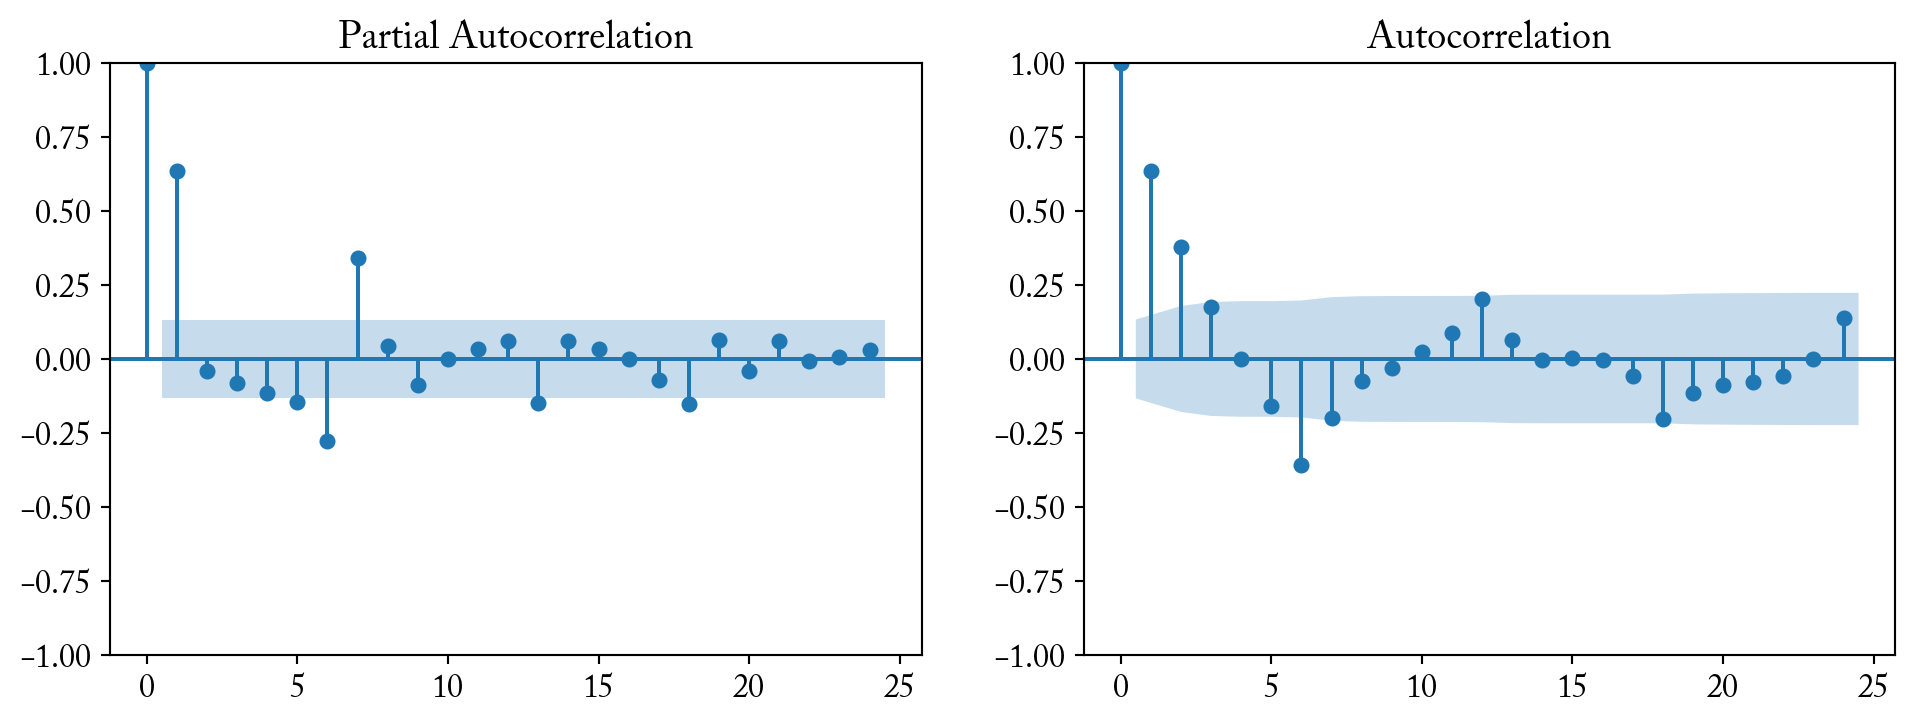

In [8]:
model_df = data.copy()
model_df.loc[:,"d_unemp"] = model_df["Start-up grant for unemployed"].diff()
fig, ax = plt.subplots(1,2, figsize=(12, 4))

plot_pacf(model_df["d_unemp"].dropna(), lags=24, ax=ax[0])
plot_acf(model_df["d_unemp"].dropna(), lags=24, ax=ax[1])

plt.show()

In [9]:
model_df.loc[:,"COVID"] = (model_df.index > "2020-05-01").astype(int)
model_df.loc[:,"lifted"] = (model_df.index > "2021-09-01").astype(int)

model_df = model_df.dropna()

model = ARIMA(model_df["d_unemp"].values, exog=model_df[["COVID","lifted"]], order=((1,6,7),0,0)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  216
Model:             ARIMA([1, 6, 7], 0, 0)   Log Likelihood               -1125.715
Date:                    Sat, 02 Mar 2024   AIC                           2265.430
Time:                            20:42:21   BIC                           2289.057
Sample:                        02-28-2006   HQIC                          2274.976
                             - 01-31-2024                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4281      7.376     -0.465      0.642     -17.885      11.029
COVID         68.1454     19.831      3.436      0.001      29.278     107.013
lifted       -53.4809     26.146     -2.046      0.041    -104.725      -2.237
ar.L1          0.6566      0.053     12.302      0.000       0.552       0.761
ar.L6         -0.4833      0.055     -8.846      0.000      -0.590      -0.376
ar.L7          0.3413      0.062      5.473      0.000       0.219       0.463
sigma2      1950.1346    191.430     10.187      0.000    1574.939    2325.330
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.97   Prob(JB):                         0.96
Heteroskedasticity (H):               1.08   Skew:                             0.04
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

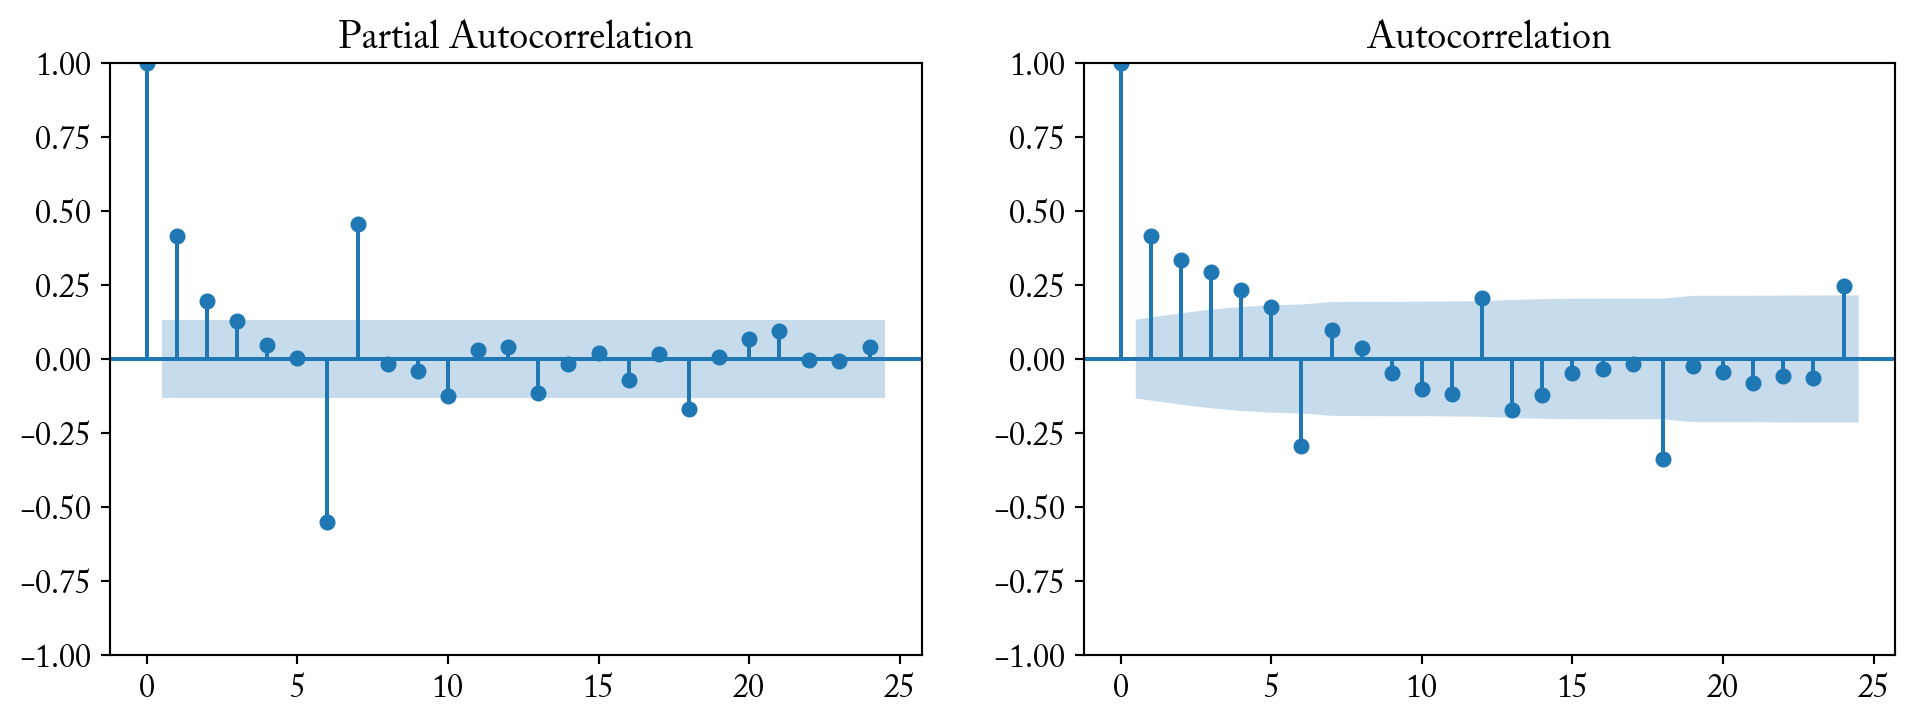

In [10]:
model_df = data.copy()
model_df.loc[:,"d_emp"] = model_df["Start-up grant for non-unemployed"].diff()
model_df = model_df.dropna()

fig, ax = plt.subplots(1,2, figsize=(12, 4))

plot_pacf(model_df["d_emp"].dropna(), lags=24, ax=ax[0])
plot_acf(model_df["d_emp"].dropna(), lags=24, ax=ax[1])

plt.show()

In [11]:
model_df.loc[:,"COVID"] = (model_df.index > "2020-05-01").astype(int)
model_df.loc[:,"lifted"] = (model_df.index > "2021-09-01").astype(int)
model = ARIMA(model_df["d_emp"].values, exog=model_df[["COVID","lifted"]], order=((1,2,6,7),0,[2])).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:                               y   No. Observations:                  216
Model:             ARIMA([1, 2, 6, 7], 0, [2])   Log Likelihood               -1171.633
Date:                         Sat, 02 Mar 2024   AIC                           2361.265
Time:                                 20:42:22   BIC                           2391.643
Sample:                             02-28-2006   HQIC                          2373.538
                                  - 01-31-2024                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5633     10.912      0.143      0.886     -19.824      22.950
COVID         95.2048     31.568      3.016      0.003      33.333     157.077
lifted       -83.2810     36.256     -2.297      0.022    -154.342     -12.220
ar.L1          0.6211      0.051     12.111      0.000       0.521       0.722
ar.L2          0.1966      0.062      3.191      0.001       0.076       0.317
ar.L6         -0.6768      0.042    -16.059      0.000      -0.759      -0.594
ar.L7          0.5152      0.058      8.954      0.000       0.402       0.628
ma.L2         -0.1663      0.078     -2.132      0.033      -0.319      -0.013
sigma2      2954.8911    228.897     12.909      0.000    2506.261    3403.522
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                27.86
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.15
Prob(H) (two-sided):                  0.33   Kurtosis:                         4.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

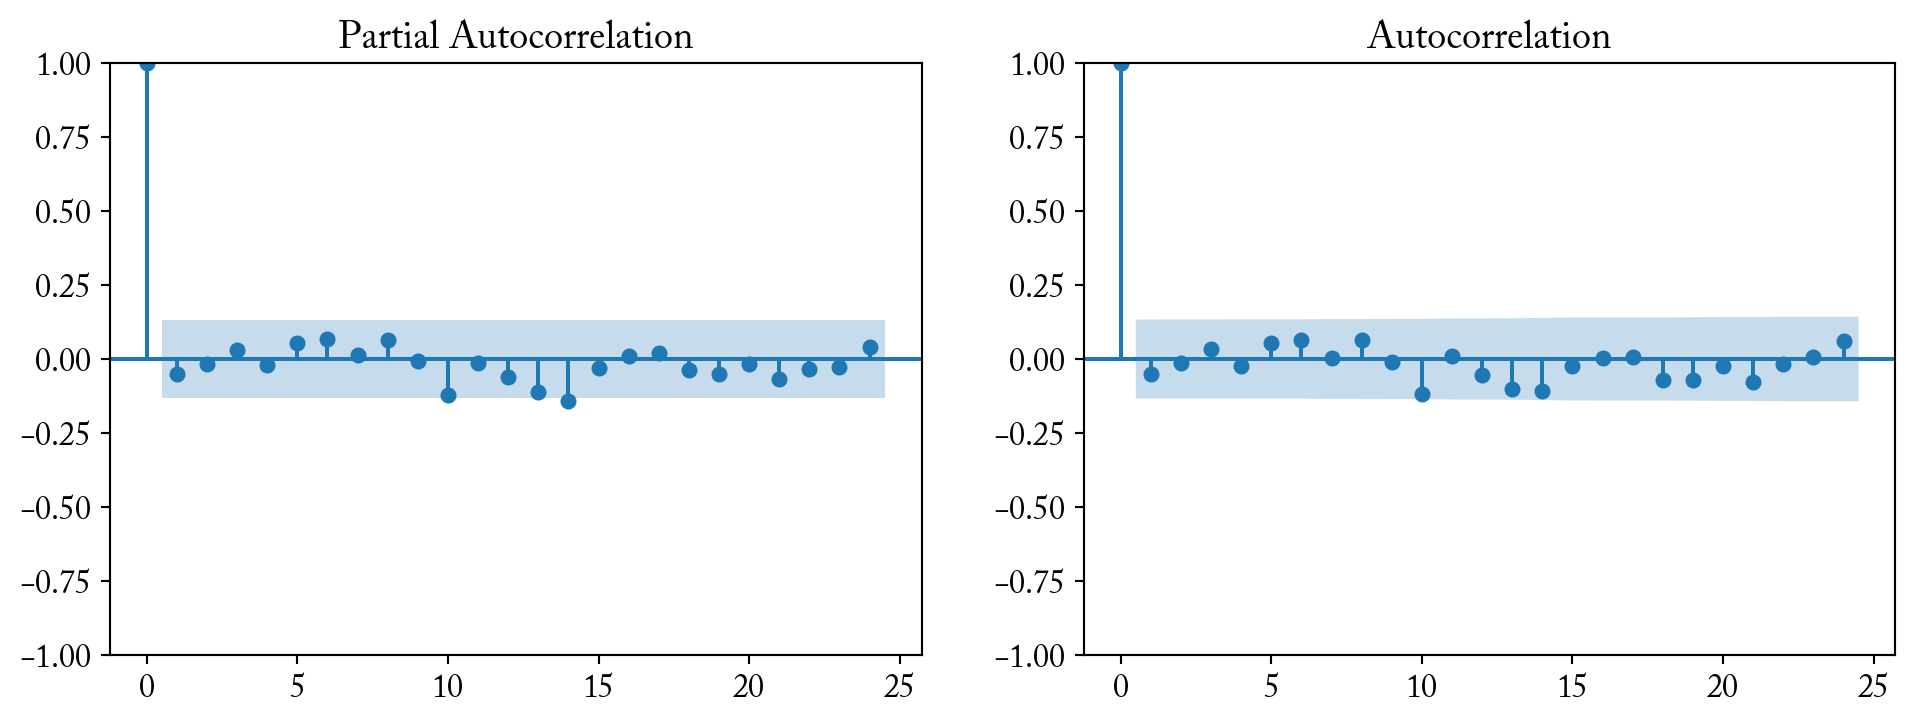

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))

plot_pacf(model.resid, lags=24, ax=ax[0])
plot_acf(model.resid, lags=24, ax=ax[1])

plt.show()